<a href="https://colab.research.google.com/github/zygarte/Alura_Challenge_Telecom_X/blob/main/telecomx_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import json

# Leer archivo JSON
with open("TelecomX_Data.json") as file:
    data = json.load(file)

# Convertir el JSON anidado a un DataFrame
df = pd.json_normalize(data)

# Estructura general
df.info()

# Estadísticas básicas
df.describe(include="all")

# Revisión de valores únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")

# Mostrar las primeras filas
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [ ]:
## 1. Conversión de tipos de datos

# Convertimos los valores monetarios a numéricos
df["account.Charges.Monthly"] = pd.to_numeric(df["account.Charges.Monthly"], errors="coerce")
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

## 2. Verificación de valores nulos o vacíos

# Ver cuántos valores faltantes hay por columna
df.isnull().sum()

# Revisar valores únicos en Churn
df["Churn"].value_counts(dropna=False)

# 💡 Si hay valores vacíos en Churn, podrías descartarlos para análisis predictivo:
df = df[df["Churn"].isin(["Yes", "No"])]

## 3. Normalización de valores tipo string

# Convertimos respuestas como "Yes", "No", etc., a minúsculas y sin espacios para uniformidad.

cols_yes_no = [
    "customer.Partner", "customer.Dependents",
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.PaperlessBilling", "Churn"
]

for col in cols_yes_no:
    df[col] = df[col].str.strip().str.lower()

# Creación de columna: Cuentas_Diarias
# Nota: Usamos .replace(0, pd.NA) para evitar divisiones por cero.
df["Cuentas_Diarias"] = df["account.Charges.Total"] / df["customer.tenure"].replace(0, pd.NA)

## 5. Codificación binaria (opcional)

# Si vas a hacer análisis más profundo o modelos, convierte valores tipo "yes"/"no" en 1/0:

df["Churn_bin"] = df["Churn"].map({"yes": 1, "no": 0})
df["account.PaperlessBilling_bin"] = df["account.PaperlessBilling"].map({"yes": 1, "no": 0})


## 6. Traducción opcional de nombres de columnas
df = df.rename(columns={
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "EsAdultoMayor",
    "customer.tenure": "MesesContrato",
    "account.Contract": "TipoContrato",
    "account.PaymentMethod": "MetodoPago",
    "account.Charges.Monthly": "GastoMensual",
    "account.Charges.Total": "GastoTotal",
    "Cuentas_Diarias": "GastoDiario"
})



/tmp/ipython-input-11-4289860154.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.strip().str.lower()
/tmp/ipython-input-11-4289860154.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cuentas_Diarias"] = df["account.Charges.Total"] / df["customer.tenure"].replace(0, pd.NA)
/tmp/ipython-input-11-4289860154.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

#📊 Carga y análisis

/tmp/ipython-input-13-2942455999.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set2")


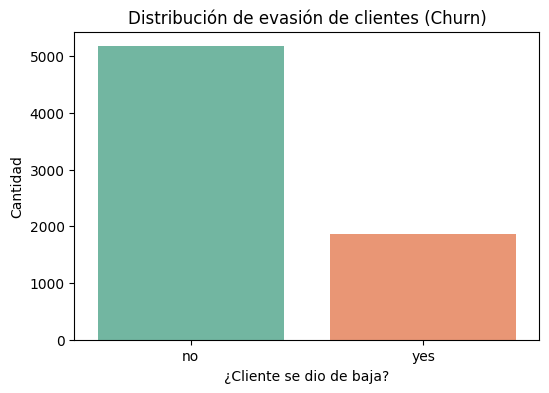

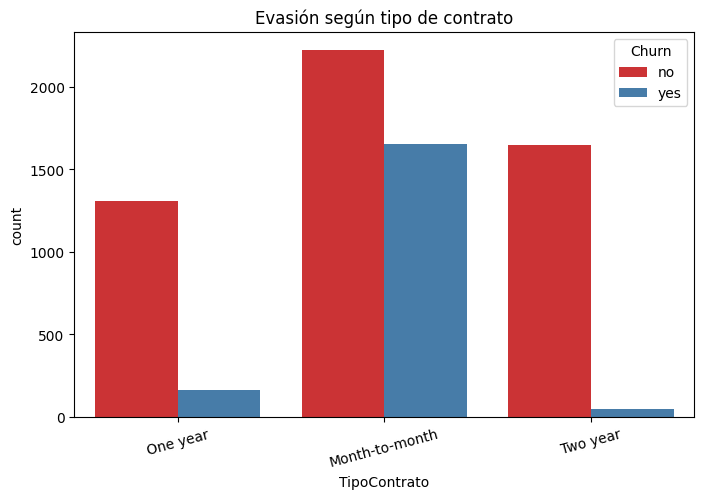

/tmp/ipython-input-13-2942455999.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="GastoMensual", palette="coolwarm")


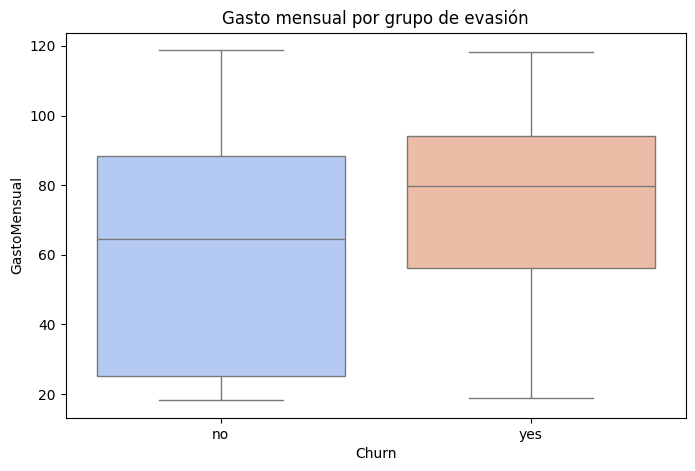

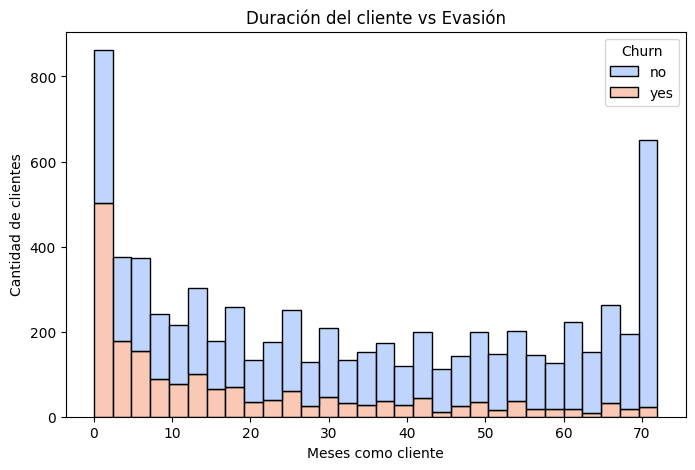

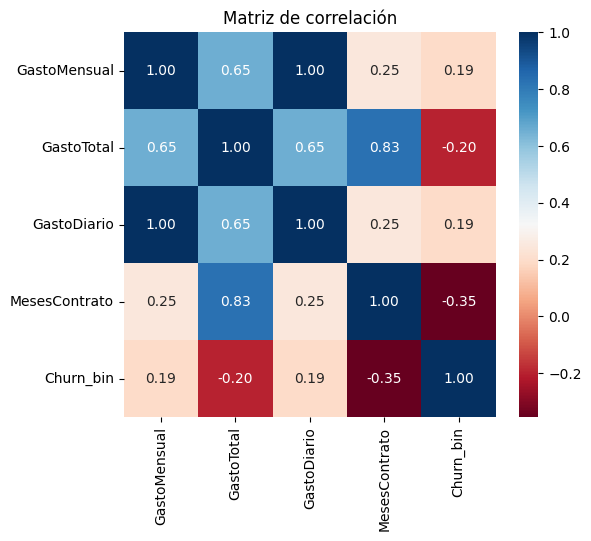

In [ ]:
# Usaremos pandas, matplotlib y seaborn. Si no los tienes instalados:
# pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Análisis Descriptivo General

# Estadísticas de columnas numéricas
df.describe()

# Estadísticas para columnas categóricas
df.describe(include=["object"])



## 2. Distribución de la Evasión (Churn)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Distribución de evasión de clientes (Churn)")
plt.xlabel("¿Cliente se dio de baja?")
plt.ylabel("Cantidad")
plt.show()


## 3. Evasión según variables categóricas

# Ejemplo: Tipo de contrato vs Evasión

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="TipoContrato", hue="Churn", palette="Set1")
plt.title("Evasión según tipo de contrato")
plt.xticks(rotation=15)
plt.show()

# Puedes repetir esto para otras variables como:

# df["Genero"]
# df["MetodoPago"]
# df["internet.InternetService"]


## 4. Evasión y variables numéricas

# Gasto mensual vs evasión

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="GastoMensual", palette="coolwarm")
plt.title("Gasto mensual por grupo de evasión")
plt.show()

# Tiempo de contrato (MesesContrato) por evasión:

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="MesesContrato", hue="Churn", multiple="stack", bins=30, palette="coolwarm")
plt.title("Duración del cliente vs Evasión")
plt.xlabel("Meses como cliente")
plt.ylabel("Cantidad de clientes")
plt.show()

## 5. Análisis de correlaciones

# Filtrar solo columnas numéricas
## df_corr = df[["GastoMensual", "GastoTotal", "GastoDiario", "MesesContrato", "Churn_bin"]].corr()

# Eliminar filas con valores faltantes solo para el cálculo de correlación
df_corr = df[["GastoMensual", "GastoTotal", "GastoDiario", "MesesContrato", "Churn_bin"]].dropna().corr()


plt.figure(figsize=(6,5))
sns.heatmap(df_corr, annot=True, cmap="RdBu", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()



#📄Informe final

## Informe Final

**🔍 Introducción**  
Este análisis busca identificar patrones que expliquen la evasión de clientes en Telecom X.

**🧹 Limpieza de Datos**  
- Conversión de columnas anidadas
- Estandarización de strings y valores faltantes
- Cálculo de gasto diario

**📊 Análisis Exploratorio**  
- Mayor evasión en clientes con contrato mensual
- Clientes con menor antigüedad y mayor gasto mensual tienden a irse
- Algunos métodos de pago tienen tasas de evasión más altas

**💡 Conclusiones**
- La permanencia aumenta con contratos más largos
- Clientes nuevos y con gastos altos son más propensos a abandonar
- El método de pago electrónico está correlacionado con mayor evasión

**🎯 Recomendaciones**
- Incentivar contratos de largo plazo
- Enfocar retención en clientes nuevos
- Ofrecer beneficios a quienes pagan electrónicamente